In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load MNIST datasets, tf=2.2
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train), len(X_test)

(60000, 10000)

In [5]:
X_train[0].shape

(28, 28)

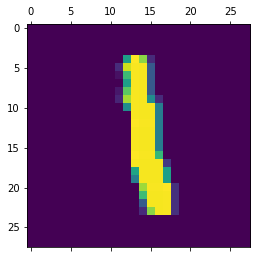

In [6]:
plt.matshow(X_train[6])

In [7]:
X_train.shape
# we want 6000, 784

(60000, 28, 28)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Flattern the datasets
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [11]:
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
# Sequential we want everything to proceed in sequence
# Dense every layer in first is connected to the other

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4877 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3065 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2858 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2753 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2681 - accuracy: 0.9260


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 933us/step - loss: 0.2692 - accuracy: 0.9261


[0.2691597640514374, 0.9261000156402588]

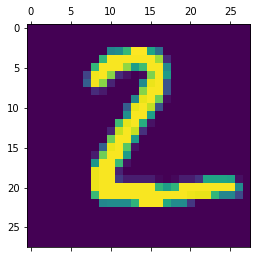

In [15]:
plt.matshow(X_test[1])

In [16]:
predicted = model.predict(X_test_flattened)
predicted[1]

array([1.9896030e-04, 1.5817732e-06, 5.9690714e-01, 2.6616454e-04,
       9.1249843e-14, 1.8458068e-03, 2.0906329e-03, 2.4712488e-16,
       9.0600093e-05, 5.0767485e-13], dtype=float32)

In [17]:
# After prediction we will se the score which is max out of the 10
# Argmax it checks the max value and gives its index as output

np.argmax(predicted[1])

2

In [18]:
predicted_labels = [np.argmax(x) for x in predicted]
predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
# We will see the confusion matrix and print the accuracy

cm = tf.math.confusion_matrix(labels= y_test, predictions= predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   6,   11,  909,   23,    8,    5,   13,    9,   45,    3],
       [   3,    0,   12,  937,    1,   18,    2,    9,   23,    5],
       [   1,    1,    4,    1,  926,    0,   11,    3,   12,   23],
       [   9,    3,    2,   44,    9,  772,   14,    3,   30,    6],
       [  11,    3,    6,    1,    7,   10,  914,    2,    4,    0],
       [   1,    9,   21,   10,    8,    1,    0,  935,    6,   37],
       [   7,    8,    6,   21,    9,   26,    8,    6,  879,    4],
       [  11,    8,    1,   13,   32,    6,    0,   16,   11,  911]])>

Text(69.0, 0.5, 'Truth')

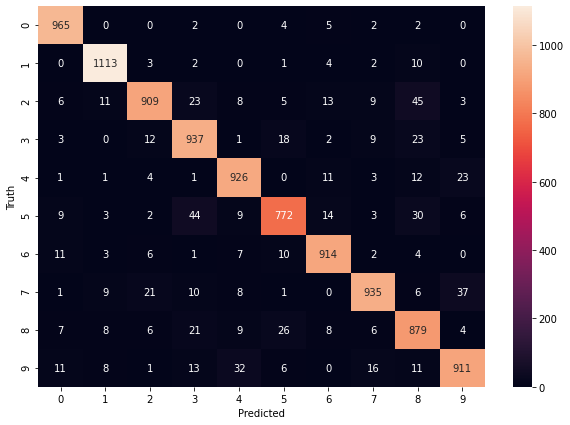

In [21]:
# Print Confusion Matrix in better way
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
# Adding hidden layer to the model
# In hidden layer we will we need to specific neurons in hidden layer - 100
# Last layer doesnot require the input shape as it is already connected to first layer

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2945 - accuracy: 0.9186
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1393 - accuracy: 0.9590
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1003 - accuracy: 0.9704
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0767 - accuracy: 0.9776
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0624 - accuracy: 0.9815


In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9755


[0.08032111823558807, 0.9754999876022339]

In [24]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   6,   11,  909,   23,    8,    5,   13,    9,   45,    3],
       [   3,    0,   12,  937,    1,   18,    2,    9,   23,    5],
       [   1,    1,    4,    1,  926,    0,   11,    3,   12,   23],
       [   9,    3,    2,   44,    9,  772,   14,    3,   30,    6],
       [  11,    3,    6,    1,    7,   10,  914,    2,    4,    0],
       [   1,    9,   21,   10,    8,    1,    0,  935,    6,   37],
       [   7,    8,    6,   21,    9,   26,    8,    6,  879,    4],
       [  11,    8,    1,   13,   32,    6,    0,   16,   11,  911]])>

Text(69.0, 0.5, 'Truth')

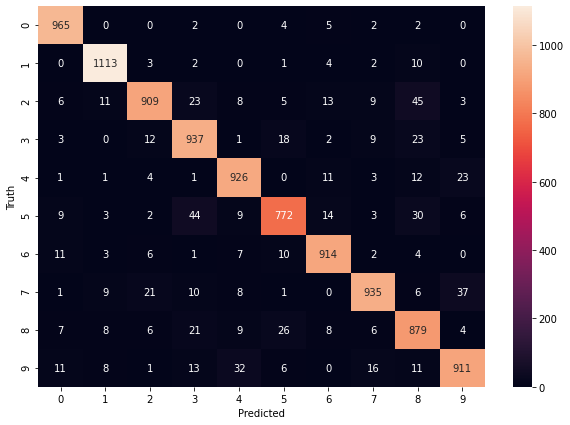

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using the Flatten layer so that we dont have to reshape it

In [30]:
# If we dont want to create the flattern array and just supply X_train, Y_train

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/adam', histogram_freq=1)

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8358 - accuracy: 0.7990
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3581 - accuracy: 0.9008
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3048 - accuracy: 0.9150
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2511 - accuracy: 0.9302


In [28]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 6408.

### Exercise
* Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

* Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: